<h1 style='color: red; font-size: 36px; font-weight: bold;'>Projeto: Previsão de Crimes no Estado de São Paulo</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)
simplefilter(action='ignore', category=UserWarning)

## O Dataset e o Projeto
<hr>

### Fonte: http://www.ssp.sp.gov.br/transparenciassp/Consulta.aspx

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Este projeto procura analisar e desenvolver um modelo preditivo baseado em dados históricos da Segurança Pública a fim de prever a ocorrência de crimes no Estado de São Paulo. A intenção geral é fornecer informações sobre a segurança de determinados bairros, dependendo do local e horário para as pessoas, contribuindo para a promoção de um ambiente mais seguro. </p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar as datasets disponíveis no Portal da Transparência. Este dataset contém as informações dos 3 últimos anos de boletins de ocorrência de furtos e roubos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
  <li><b>periodo</b>: Indica período em que BO foi registrado.</li>
  <li><b>anoBO</b>: Indica ano em que BO foi registrado.</li>
  <li><b>numeroBO</b>: Indica número do BO.</li>
  <li><b>numeroBoletim</b>: Indica protocolo do BO.</li>
  <li><b>boIniciado</b>: Indica data de abertura do BO.</li>
  <li><b>boEmitido</b>: Indica data de emissão do BO.</li>
  <li><b>dataOcorrencia</b>: Indica data da ocorrência de Roubo/Furto.</li>
  <li><b>horaOcorrencia</b>: Indica o horário da ocorrência de Roubo/Furto.</li>
  <li><b>periodoOcorrencia</b>: Indica o período do dia da ocorrência de Roubo/Furto.</li>
  <li><b>dataComunicacao</b>Indica data da comunicação do ocorrido.</li>
  <li><b>boAutoria</b>: - </li>
  <li><b>flagrante</b>: Indica se houve flagrante no ato da ocorrência.</li>
  <li><b>numeroBoletimPrincipal</b>:</li>
  <li><b>logradouro</b>: Logradouro da ocorrência.</li>
  <li><b>numero</b>: Número do logradouro da ocorrência.</li>
  <li><b>bairro</b>: Bairro da ocorrência.</li>
  <li><b>cidade</b>: Cidade da ocorrência.</li>
  <li><b>descricaoLocal</b>: Descreve grupo de tipos de locais onde se deu o fato.</li>
  <li><b>solucao</b>: Soluções tomadas pelo Departamento de Polícia.</li>
  <li><b>tipoDelegacia</b>: Indica se BO foi registrado na delegacia física (0) ou digital (1). </li>
  <li><b>rubrica</b>: Natureza jurídica da ocorrência.</li>
  <li><b>consumado</b>: Indica se é crime consumado (1) ou tentado (0).</li>
  <li><b>vitimaFatal</b>: Se houve (1) ou não (0) vítima fatal.</li>
  <li><b>sexo</b>: Sexo da vítima.</li>
  <li><b>idade</b>: Idade da vítima.</li>
  <li><b>estadoCivil</b>: Estado civil da vítima.</li>
  <li><b>profissao</b>: Profissão da vítima.</li>
  <li><b>grauInstrucao</b>: Grau de instrução da vítima.</li>
  <li><b>cor</b>: Cor da pele da vítima.</li>
  <li><b>quantidadeCelular</b>: Indica a quantidade de celulares roubadas/furtadas.</li>
  <li><b>marcaCelular</b>: Indica a marca da celular roubada/furtada.</li>
</ul>


## Leitura dos dados

Dataset está na pasta "Dados" com o nome "boletins_2018_2023.csv" e usa "\t" como separador.

In [3]:
dados = pd.read_csv('Dados\\boletins_2018_2023.csv', sep='\t', encoding='utf-16', low_memory=False)

## Visualizar os dados

In [4]:
# Visualizando todas as colunas.
pd.set_option('display.max_columns', None)

dados.head()

,id_categoria,categoria,periodo_boletim,dia_semana_boletim,numero_boletim,numero_boletim_principal,boletim_iniciado,boletim_emitido,periodo_ocorrencia,data_ocorrencia,hora_ocorrencia,dia_semana_ocorrencia,periodo_dia_ocorrencia,logradouro,numero,bairro,id_cidade,cidade,descricao_local,solucao,tipo_delegacia,nome_delegacia,rubrica,flagrante,consumado,vitima_fatal,sexo,idade,estado_civil,profissao,grau_instrucao,cor,quantidade_celular,marca_celular,id_arquivo
0,2,RouboCelular,2018-01,2,5/2018,NaN,2018-01-01 08:21:06,2018-01-01 13:21:09,2018-01,2018-01-01,04:30:00,2,MADRUGADA,NaN,NaN,NaN,NaN,NaN,RESIDÊNCIA,ENCAMINHAMENTO DP ÁREA DO FATO,1,DEL.SEC.BARRETOS PLANTÃO,ROUBO (ART. 157) - OUTROS,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,OUTROS,262
1,2,RouboCelular,2018-01,2,5/2018,NaN,2018-01-01 08:21:06,2018-01-01 13:21:09,2018-01,2018-01-01,04:30:00,2,MADRUGADA,NaN,NaN,NaN,NaN,NaN,RESIDÊNCIA,ENCAMINHAMENTO DP ÁREA DO FATO,1,DEL.SEC.BARRETOS PLANTÃO,ART. 213 - ESTUPRO,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,OUTROS,262
2,2,RouboCelular,2018-01,2,21/2018,NaN,2018-01-01 14:23:42,2018-01-01 16:06:24,2018-01,2018-01-01,00:00:00,2,HORA INCERTA,NaN,NaN,NaN,NaN,NaN,VIA PÚBLICA,ENCAMINHAMENTO DP ÁREA DO FATO,1,DEL.SEC.S.J RIO PRETO PLANTÃO,ROUBO (ART. 157) - TRANSEUNTE,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,ASUS,262
3,2,RouboCelular,2018-01,2,21/2018,NaN,2018-01-01 14:23:42,2018-01-01 16:06:24,2018-01,2018-01-01,00:00:00,2,HORA INCERTA,NaN,NaN,NaN,NaN,NaN,VIA PÚBLICA,ENCAMINHAMENTO DP ÁREA DO FATO,1,DEL.SEC.S.J RIO PRETO PLANTÃO,ESTUPRO DE VULNERAVEL (ART.217-A),0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,ASUS,262
4,2,RouboCelular,2018-01,5,112/2018,NaN,2018-01-04 12:00:32,2018-01-04 13:50:53,2018-01,2018-01-01,22:40:00,2,NOITE,NaN,NaN,NaN,NaN,NaN,VIA PÚBLICA,BO PARA INVESTIGAÇÃO,1,24º D.P. PONTE RASA,ROUBO (ART. 157) - TRANSEUNTE,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,LG,262


## Verificando o tamanho do dataset

In [5]:
linhas, colunas = dados.shape
print(f'{linhas} linhas\n{colunas} colunas')

2439547 linhas
35 colunas


## Verificando os tipos de dados

In [6]:
# Verificando os tipos de dados.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2439547 entries, 0 to 2439546
Data columns (total 35 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   id_categoria              int64  
 1   categoria                 object 
 2   periodo_boletim           object 
 3   dia_semana_boletim        int64  
 4   numero_boletim            object 
 5   numero_boletim_principal  object 
 6   boletim_iniciado          object 
 7   boletim_emitido           object 
 8   periodo_ocorrencia        object 
 9   data_ocorrencia           object 
 10  hora_ocorrencia           object 
 11  dia_semana_ocorrencia     int64  
 12  periodo_dia_ocorrencia    object 
 13  logradouro                object 
 14  numero                    float64
 15  bairro                    object 
 16  id_cidade                 float64
 17  cidade                    object 
 18  descricao_local           object 
 19  solucao                   object 
 20  tipo_delegacia          

In [7]:
# Verificando os valores nulos na dataframe.
dados.isnull().sum()

id_categoria                      0
categoria                         0
periodo_boletim                   0
dia_semana_boletim                0
numero_boletim                    0
numero_boletim_principal    2185875
boletim_iniciado                  0
boletim_emitido                   0
periodo_ocorrencia                0
data_ocorrencia                   0
hora_ocorrencia              690961
dia_semana_ocorrencia             0
periodo_dia_ocorrencia            0
logradouro                   171926
numero                         3232
bairro                        51563
id_cidade                      3267
cidade                         3267
descricao_local                   0
solucao                           0
tipo_delegacia                    0
nome_delegacia                    0
rubrica                           0
flagrante                         0
consumado                         0
vitima_fatal                      0
sexo                        2432634
idade                       

### Padronizando as colunas para o tipo correto

In [8]:
# Convertendo para datetime as colunas que são datas.
dados['boletim_iniciado'] = pd.to_datetime(dados['boletim_iniciado'])
dados['boletim_emitido'] = pd.to_datetime(dados['boletim_emitido'])
dados['data_ocorrencia'] = pd.to_datetime(dados['data_ocorrencia'])

# Convertendo para time as colunas que são horas.
dados['hora_ocorrencia'] = pd.to_datetime(dados['hora_ocorrencia'], format='%H:%M:%S').dt.time

# Convertendo para inteiro as colunas que são números inteiros.
dados['id_cidade'] = dados['id_cidade'].fillna(0).astype(int)
dados['idade'] = dados['idade'].fillna(0).astype(int)

### Padronizando os dados da coluna "periodoOcorrencia"
* DE MADRUGADA: 0h às 6h
* PELA MANHÃ: 6h às 12h
* A TARDE: 12h às 18h
* A NOITE: 18h às 0h

In [9]:
# Função para categorizar as horas
def categorizar_horas(hora):
    if 0 <= hora.hour < 6:
        return 'MADRUGADA'
    elif 6 <= hora.hour < 12:
        return 'MANHÃ'
    elif 12 <= hora.hour < 18:
        return 'TARDE'
    elif 18 <= hora.hour < 24:
        return 'NOITE'
    else:
        return 'HORA INCERTA'

# Aplicando a função para categorizar as horas da ocorrência corretamente na coluna "periodoOcorrencia"
dados['periodo_dia_ocorrencia'] = dados['hora_ocorrencia'].apply(categorizar_horas)

In [10]:
# Deletando colunas que não serão utilizadas na análise.
dados.drop(columns=['id_categoria', 'numero_boletim_principal', 'id_arquivo', 'logradouro', 'numero', 'profissao', 'rubrica'], inplace=True)

In [11]:
# Deletando os dados duplicados.
dados.drop_duplicates(inplace=True)

# Resetando o index. 
dados.reset_index(drop=True, inplace= True)

# Exibindo as informações das colunas padronizadas.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143376 entries, 0 to 2143375
Data columns (total 28 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   categoria               object        
 1   periodo_boletim         object        
 2   dia_semana_boletim      int64         
 3   numero_boletim          object        
 4   boletim_iniciado        datetime64[ns]
 5   boletim_emitido         datetime64[ns]
 6   periodo_ocorrencia      object        
 7   data_ocorrencia         datetime64[ns]
 8   hora_ocorrencia         object        
 9   dia_semana_ocorrencia   int64         
 10  periodo_dia_ocorrencia  object        
 11  bairro                  object        
 12  id_cidade               int32         
 13  cidade                  object        
 14  descricao_local         object        
 15  solucao                 object        
 16  tipo_delegacia          int64         
 17  nome_delegacia          object        
 18  fl

### Separando as dataframes: dados_ocorrencias, dados_vitimas e dados_celular

In [12]:
# Dividir o DataFrame em três partes com base nas colunas.
dados_ocorrencias = dados.iloc[:, :21]
dados_vitimas = dados.iloc[:, 21:26]

### Separando as dataframes: dados_furto e dados_roubo

In [13]:
# Separando os dados de Furto
dados_furto = dados_ocorrencias.loc[dados_ocorrencias['categoria'] == 'FurtoCelular']

# Separando os dados de Roubo
dados_roubo = dados_ocorrencias.loc[dados_ocorrencias['categoria'] == 'RouboCelular']

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Importando biblioteca seaborn

In [14]:
import seaborn as sns

## Análises: Ocorrências

### Boletins registrados por ano

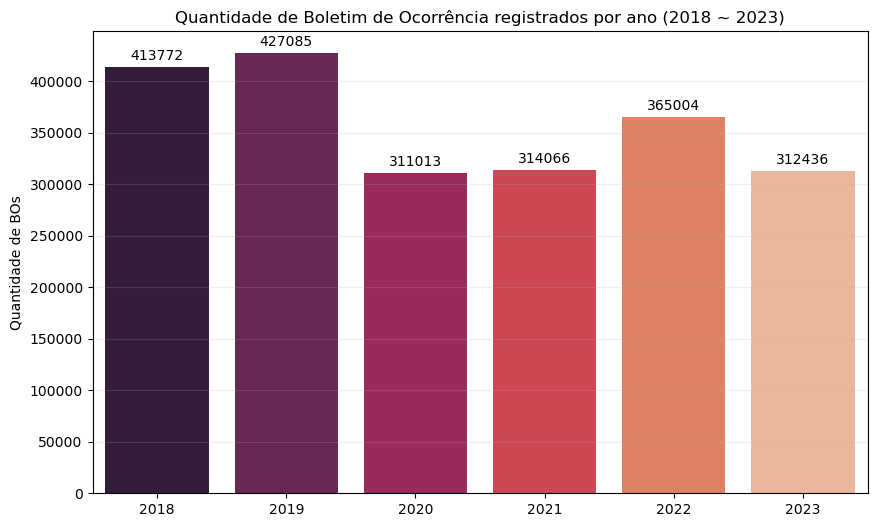

In [15]:
# Contar a quantidade de BO registrados por ano.
contagem = dados_ocorrencias['boletim_emitido'].dt.year.value_counts().sort_index()

# Gerando o gráfico.
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=contagem.index, y=contagem.values, palette='rocket')
ax.set(title='Quantidade de Boletim de Ocorrência registrados por ano (2018 ~ 2023)', xlabel='', ylabel='Quantidade de BOs')
# Adicionando labels aos valores das barras.
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 8), 
                textcoords = 'offset points')
ax.grid(axis='y', alpha=0.2)   
fig = plt.gcf()
plt.show()

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/quantidade_BO_ano.png', transparent=False, dpi=300, bbox_inches='tight')

### Comparativo de ocorrências: Roubo x Furto

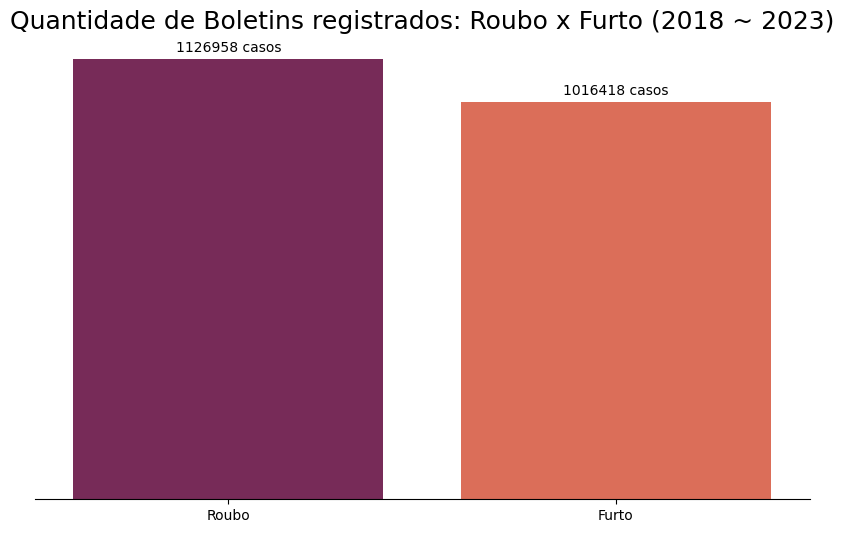

In [16]:
contagem_roubos = dados_roubo['numero_boletim'].count()
contagem_furtos = dados_furto['numero_boletim'].count()

# Gerando o gráfico.
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=['Roubo', 'Furto'], y=[contagem_roubos, contagem_furtos], palette='rocket')
ax.set_title('Quantidade de Boletins registrados: Roubo x Furto (2018 ~ 2023)', fontsize=18, loc='center')
ax.set(xlabel='', ylabel='', yticks=[])

# Adicionando labels aos valores das barras.
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f') + ' casos', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 8), 
                textcoords = 'offset points')
ax.set_yticklabels(ax.get_yticks().astype(int))
sns.despine(left=True)
fig = plt.gcf()
plt.show()

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/comparativo_roubo_furto.png', transparent=False, dpi=300, bbox_inches='tight')

### Ocorrências por mês (2018 ~ 2023)

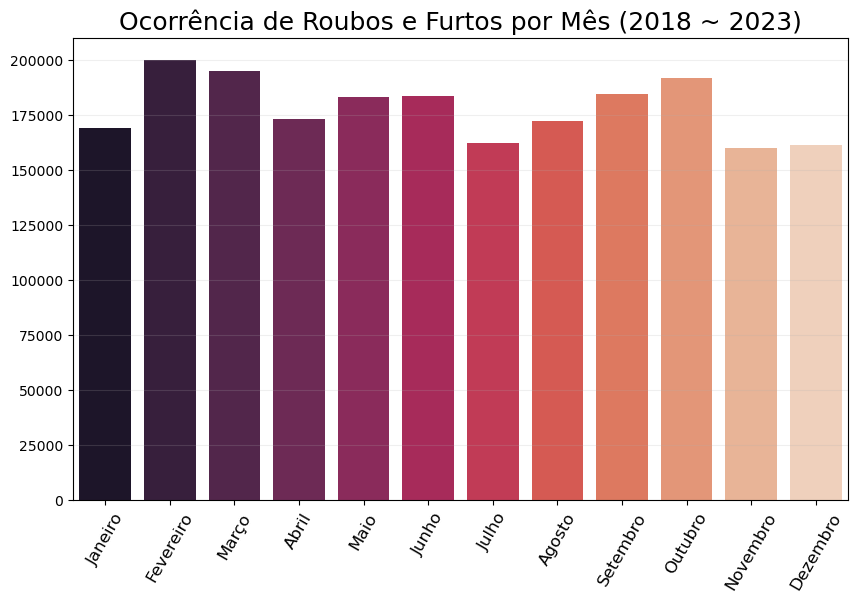

In [17]:
# Filtrando as ocorrências a partir do 2018-01-01 em diante.
datas_invalidas = (dados_ocorrencias['data_ocorrencia'] < '2018-01-01')
dados_ocorrencias.drop(dados_ocorrencias[datas_invalidas].index, inplace=True)
dados_ocorrencias.reset_index(drop=True, inplace= True)

# Contar a quantidade de ocorrências por mês.
contagem = dados_ocorrencias['data_ocorrencia'].dt.month.value_counts().sort_index()

# Gerando o gráfico.
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=contagem.index, y=contagem.values, palette='rocket')
ax.set_title('Ocorrência de Roubos e Furtos por Mês (2018 ~ 2023)', loc='center', fontsize=18)
ax.set_xticklabels(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'], fontsize=12, rotation=60)
ax.set_xticks(range(0,12))
ax.set_xlabel('')
ax.grid(axis='y', alpha=0.2)   
fig = plt.gcf()
plt.show()  

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/quantidade_ocorrencia_mensal.png', transparent=False, dpi=300, bbox_inches='tight')

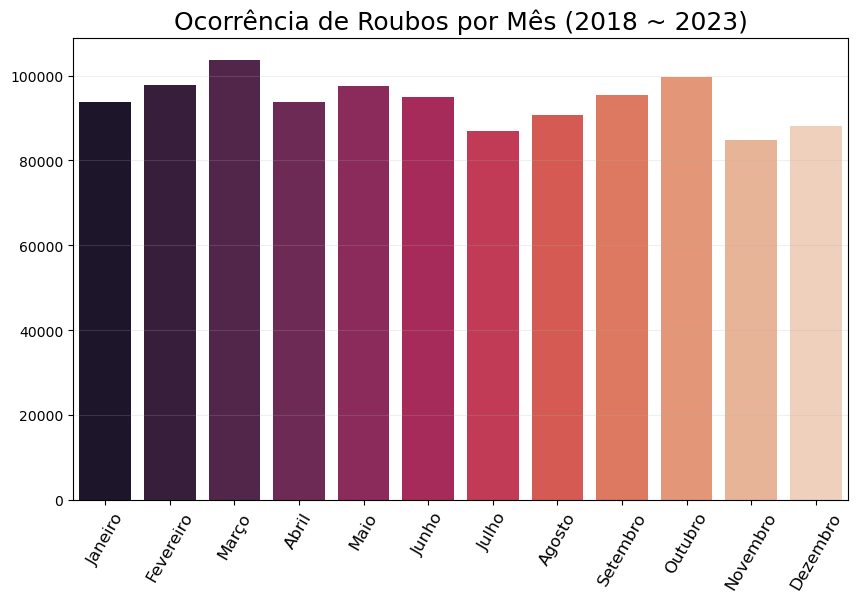

In [18]:
# Contar a quantidade de ocorrências por mês.
contagem_roubos = dados_roubo['data_ocorrencia'].dt.month.value_counts().sort_index()

# Gerando o gráfico.
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=contagem_roubos.index, y=contagem_roubos.values, palette='rocket')
ax.set_title('Ocorrência de Roubos por Mês (2018 ~ 2023)', loc='center', fontsize=18)
ax.set_xticklabels(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'], fontsize=12, rotation=60)
ax.set_xticks(range(0,12))
ax.set_xlabel('')
ax.grid(axis='y', alpha=0.2)   
fig = plt.gcf()
plt.show()

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/comparativo_mensal_roubo.png', transparent=False, dpi=300, bbox_inches='tight')

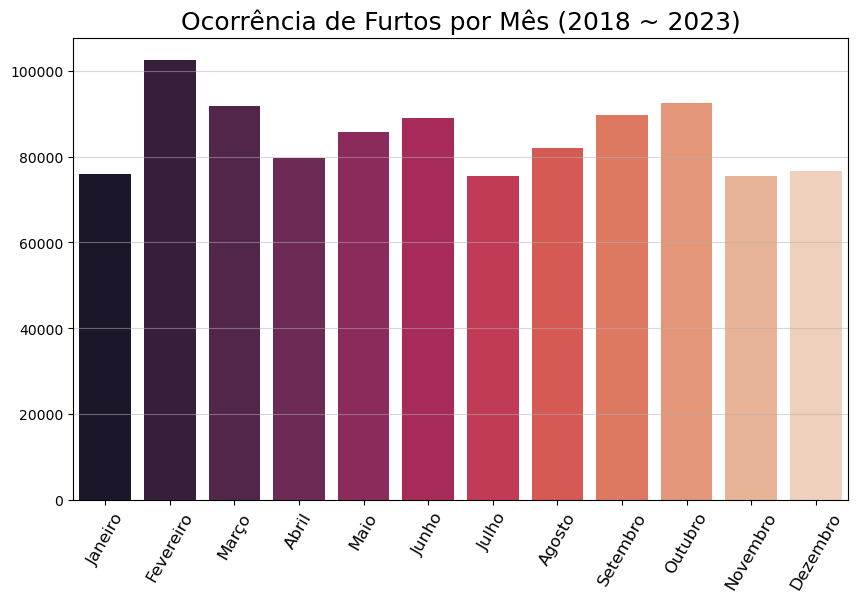

In [19]:
# Contar a quantidade de ocorrências por mês.
contagem_furtos = dados_furto['data_ocorrencia'].dt.month.value_counts().sort_index()

# Gerando o gráfico.
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=contagem_furtos.index, y=contagem_furtos.values, palette='rocket')
ax.set_title('Ocorrência de Furtos por Mês (2018 ~ 2023)', loc='center', fontsize=18)
ax.set_xticklabels(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'], fontsize=12, rotation=60)
ax.set_xticks(range(0,12))
ax.set_xlabel('')
ax.grid(axis='y', alpha=0.5)   
fig = plt.gcf()
plt.show()  

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/comparativo_mensal_furto.png', transparent=False, dpi=300, bbox_inches='tight')

C:\Users\natsu\AppData\Local\Temp\ipykernel_17064\2348151676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_furto.drop(dados_furto[datas_invalidas].index, inplace=True)
C:\Users\natsu\AppData\Local\Temp\ipykernel_17064\2348151676.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_roubo.drop(dados_roubo[datas_invalidas].index, inplace=True)


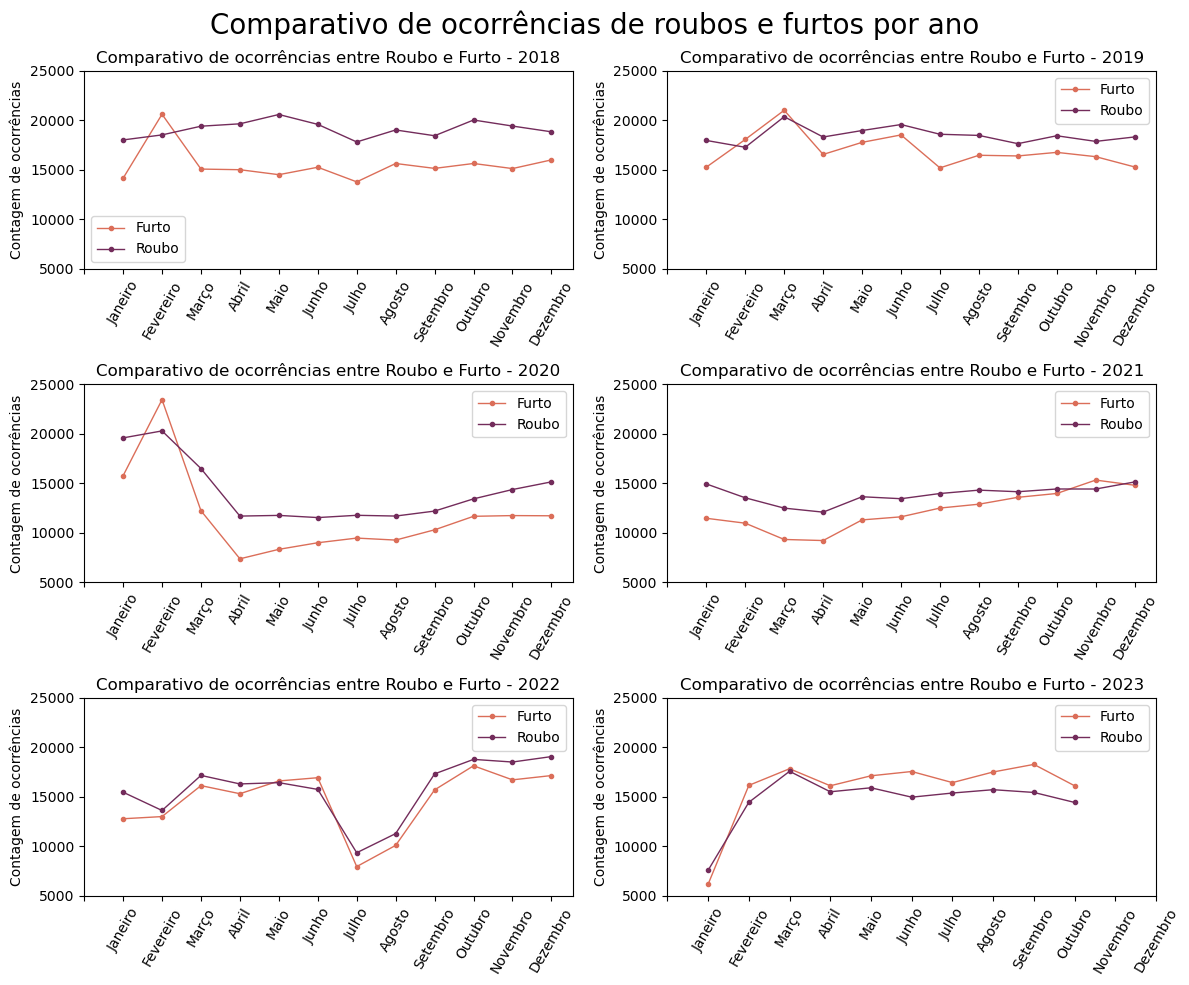

In [20]:
datas_invalidas = (dados_furto['data_ocorrencia'] < '2018-01-01')
dados_furto.drop(dados_furto[datas_invalidas].index, inplace=True)
dados_furto.reset_index(drop=True, inplace= True)
datas_invalidas = (dados_roubo['data_ocorrencia'] < '2018-01-01')
dados_roubo.drop(dados_roubo[datas_invalidas].index, inplace=True)
dados_roubo.reset_index(drop=True, inplace= True)
contagem_furto = dados_furto.groupby([dados_furto['data_ocorrencia'].dt.year.rename('ano'), dados_furto['data_ocorrencia'].dt.month.rename('mes')]).size().reset_index(name='counts')
contagem_roubo = dados_roubo.groupby([dados_roubo['data_ocorrencia'].dt.year.rename('ano'), dados_roubo['data_ocorrencia'].dt.month.rename('mes')]).size().reset_index(name='counts')

# Criando subplots.
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Plotando o gráfico.
for i, year in enumerate(contagem_furto['ano'].unique()):
    ax = axes[i//2, i%2]
    furto = contagem_furto[contagem_furto['ano'] == year]
    roubo = contagem_roubo[contagem_roubo['ano'] == year]
    ax.plot(furto['mes'], furto['counts'], linewidth=1, linestyle='-', marker='o', markersize=3, label='Furto', color='#db6e59')
    ax.plot(roubo['mes'], roubo['counts'], linewidth=1, linestyle='-', marker='o', markersize=3, label='Roubo', color='#732c5b')
    ax.set_xticks(range(0, 13))
    ax.set_xticklabels(['','Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'], fontsize=10, rotation=60)
    ax.set_ylabel('Contagem de ocorrências')
    ax.set_ylim(5000, 25000)
    ax.set_title(f'Comparativo de ocorrências entre Roubo e Furto - {year}')
    fig.suptitle('Comparativo de ocorrências de roubos e furtos por ano', fontsize=20)
    ax.legend()

plt.tight_layout()
fig = plt.gcf()
plt.show()

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/comparativo_roubo_furto_ano.png', transparent=False, dpi=300, bbox_inches='tight')


### Distribuição de ocorrências de roubos e furtos por ano

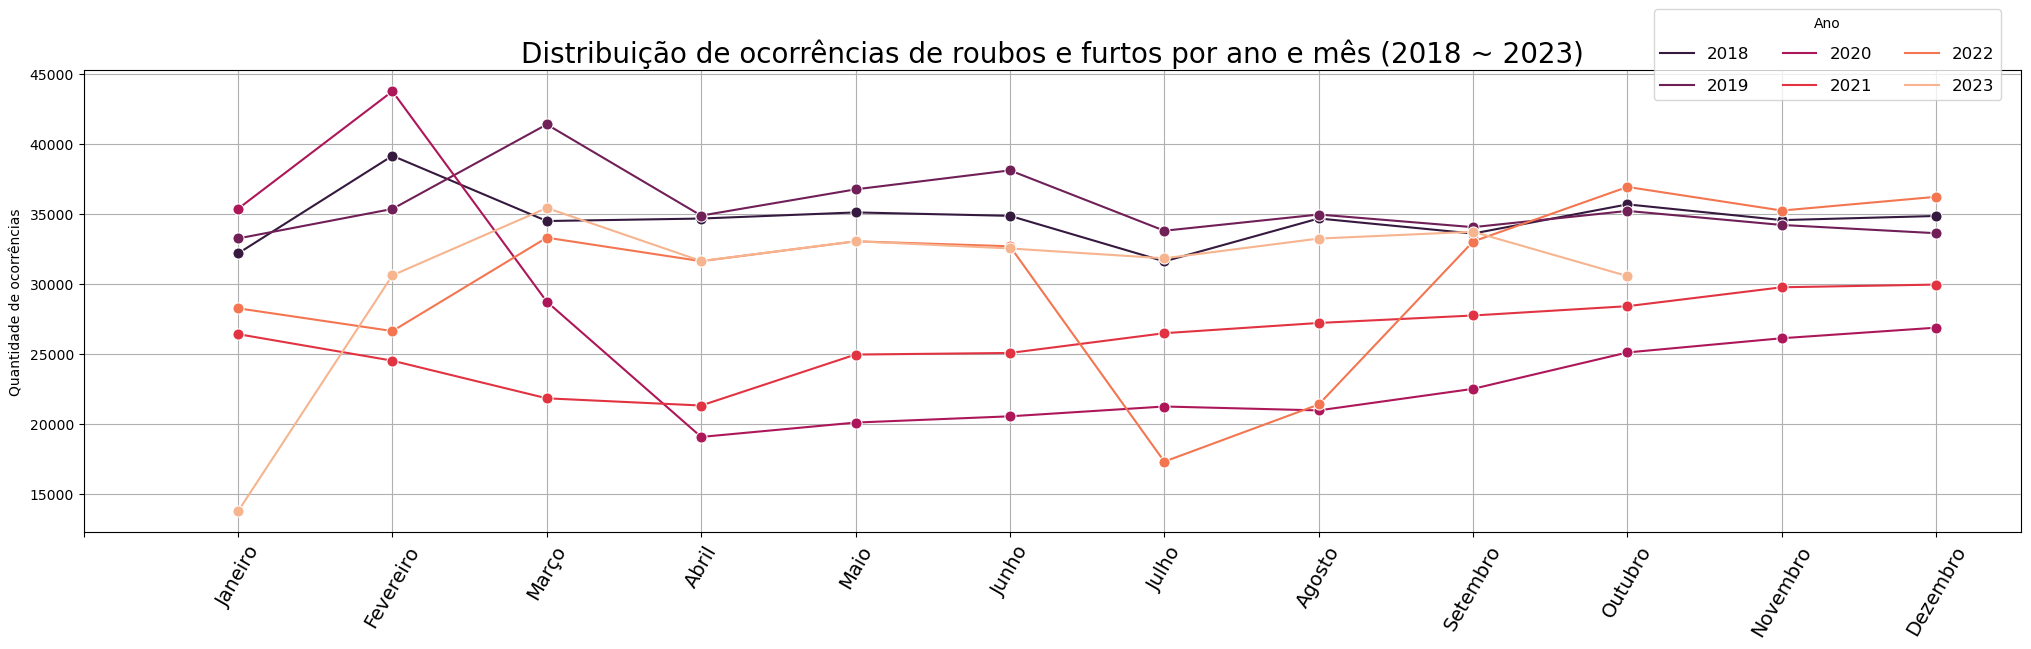

In [21]:
# Criando coluna anoOcorrencia.
dados_ocorrencias['ano_ocorrencia'] = dados_ocorrencias['data_ocorrencia'].dt.year.astype(str)
dados_ocorrencias['mes_ocorrencia'] = dados_ocorrencias['data_ocorrencia'].dt.month

# Agrupando os dados por mês e ano e contando as ocorrências.
ocorrencias_por_mes = dados_ocorrencias.groupby([dados_ocorrencias['ano_ocorrencia'], dados_ocorrencias['mes_ocorrencia']]).size().reset_index(name='contagem')

# Gerando o gráfico de linha.
fig, ax = plt.subplots(figsize=(25,6))
sns.lineplot(x='mes_ocorrencia', y='contagem', hue='ano_ocorrencia', marker='o', markersize=8, data=ocorrencias_por_mes, palette='rocket')
ax.set_title('Distribuição de ocorrências de roubos e furtos por ano e mês (2018 ~ 2023)', loc='center', fontsize=20)
ax.set(xlabel='', ylabel='Quantidade de ocorrências')
ax.set_xticks(range(0,13))
ax.set_xticklabels(['','Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'], fontsize=14, rotation=60)
ax.grid()
ax.legend(title='Ano',
          loc=9, 
          bbox_to_anchor=(0.9,1.15),
          labelspacing=1,
          ncol=3, fontsize=12)
fig = plt.gcf()
plt.show()


# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/quantidade_ocorrencias_ano_mes.png', transparent=False, dpi=300, bbox_inches='tight')

C:\Users\natsu\AppData\Local\Temp\ipykernel_17064\2659075068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_roubo.drop(dados_roubo[datas_invalidas].index, inplace=True)
C:\Users\natsu\AppData\Local\Temp\ipykernel_17064\2659075068.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_roubo['ano_ocorrencia'] = dados_roubo['data_ocorrencia'].dt.year.astype(str)
C:\Users\natsu\AppData\Local\Temp\ipykernel_17064\2659075068.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

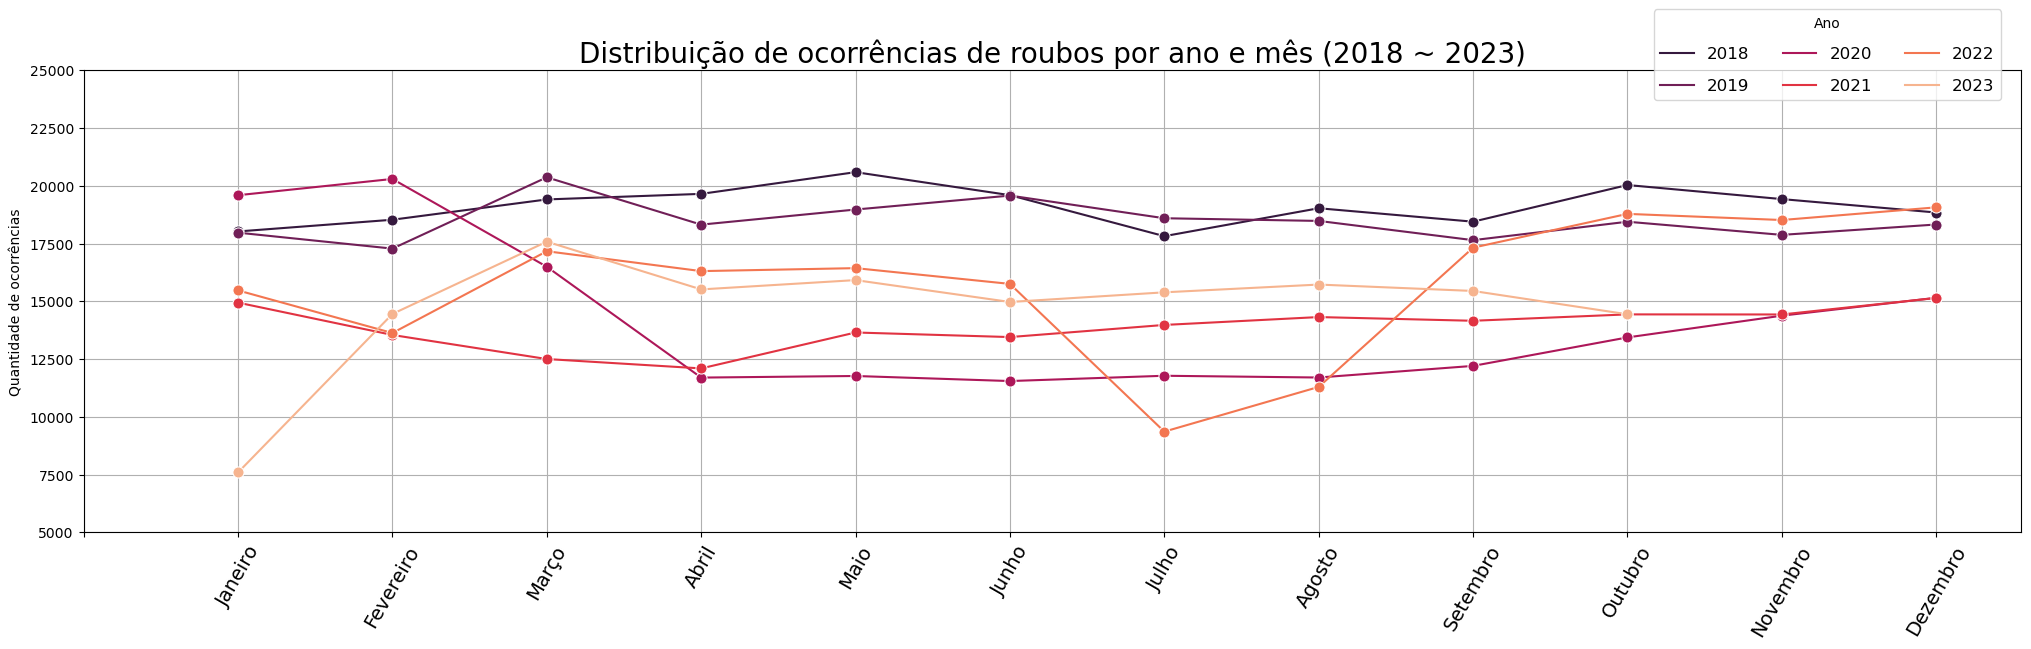

In [22]:
# Filtrando as ocorrências a partir do 2018-01-01 em diante.
datas_invalidas = (dados_roubo['data_ocorrencia'] < '2018-01-01')
dados_roubo.drop(dados_roubo[datas_invalidas].index, inplace=True)
dados_roubo.reset_index(drop=True, inplace= True)

# Criando coluna anoOcorrencia.
dados_roubo['ano_ocorrencia'] = dados_roubo['data_ocorrencia'].dt.year.astype(str)
dados_roubo['mes_ocorrencia'] = dados_roubo['data_ocorrencia'].dt.month

# Agrupando os dados por mês e ano e contando as ocorrências.
ocorrencias_por_mes = dados_roubo.groupby([dados_roubo['ano_ocorrencia'], dados_roubo['mes_ocorrencia']]).size().reset_index(name='contagem')

# Gerando o gráfico de linha.
fig, ax = plt.subplots(figsize=(25,6))
sns.lineplot(x='mes_ocorrencia', y='contagem', hue='ano_ocorrencia', marker='o', markersize=8, data=ocorrencias_por_mes, palette='rocket')
ax.set_title('Distribuição de ocorrências de roubos por ano e mês (2018 ~ 2023)', loc='center', fontsize=20)
ax.set(xlabel='', ylabel='Quantidade de ocorrências')
ax.set_xticks(range(0,13))
ax.set_xticklabels(['','Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'], fontsize=14, rotation=60)
ax.set_ylim(5000, 25000)
ax.grid()
ax.legend(title='Ano',
          loc=9, 
          bbox_to_anchor=(0.9,1.15),
          labelspacing=1,
          ncol=3, fontsize=12)
fig = plt.gcf()
plt.show()


# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/quantidade_ocorrencias_roubo_ano_mes.png', transparent=False, dpi=300, bbox_inches='tight')

C:\Users\natsu\AppData\Local\Temp\ipykernel_17064\2336299303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_furto.drop(dados_furto[datas_invalidas].index, inplace=True)
C:\Users\natsu\AppData\Local\Temp\ipykernel_17064\2336299303.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_furto['ano_ocorrencia'] = dados_furto['data_ocorrencia'].dt.year.astype(str)
C:\Users\natsu\AppData\Local\Temp\ipykernel_17064\2336299303.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

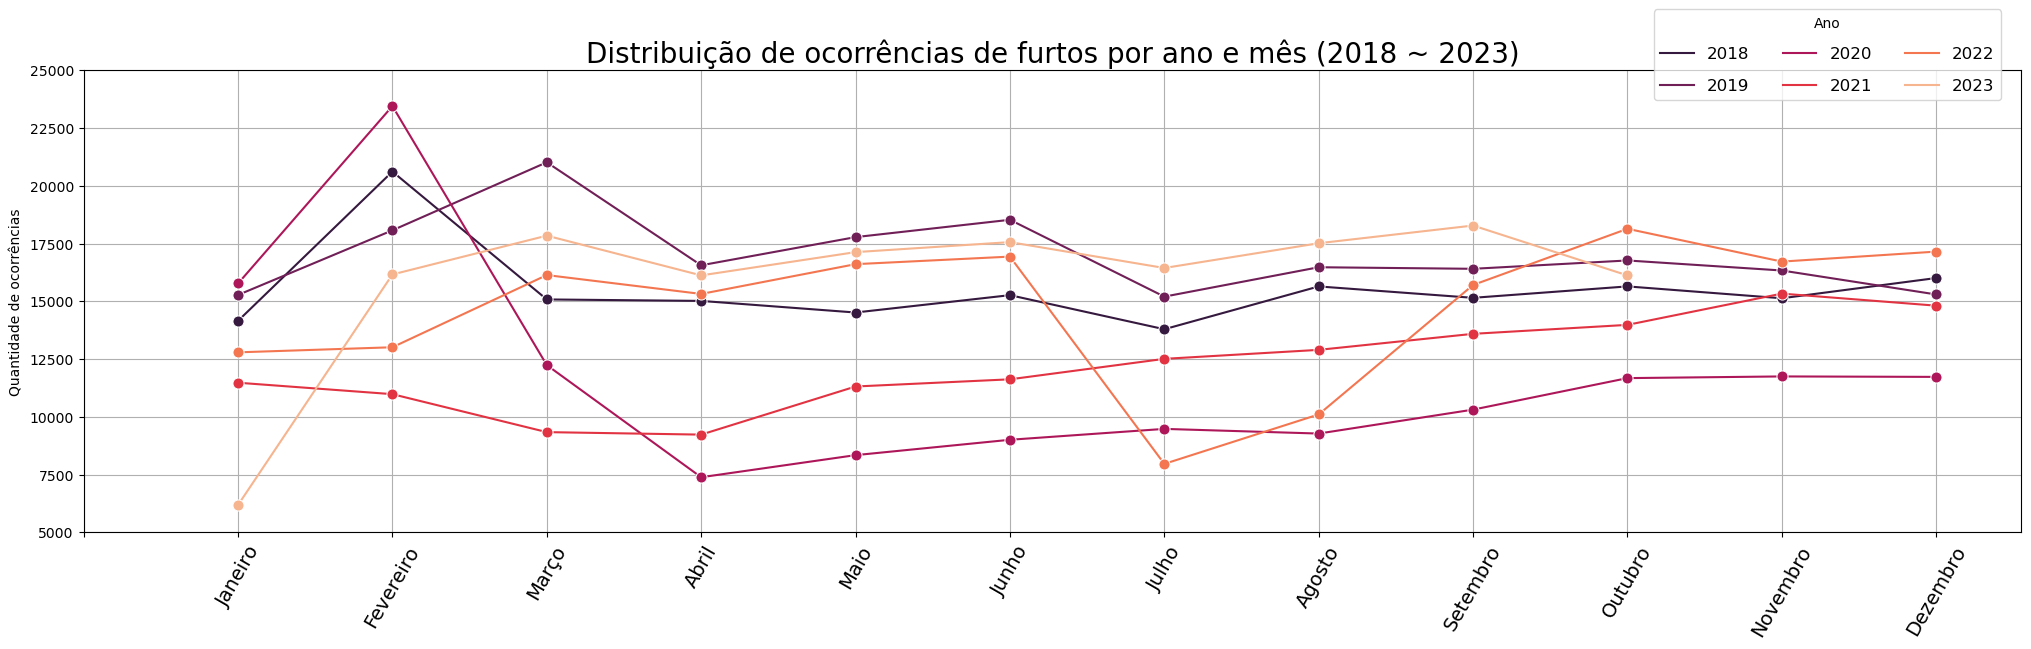

In [23]:
# Filtrando as ocorrências a partir do 2018-01-01 em diante.
datas_invalidas = (dados_furto['data_ocorrencia'] < '2018-01-01')
dados_furto.drop(dados_furto[datas_invalidas].index, inplace=True)
dados_furto.reset_index(drop=True, inplace=True)

# Criando coluna anoOcorrencia.
dados_furto['ano_ocorrencia'] = dados_furto['data_ocorrencia'].dt.year.astype(str)
dados_furto['mes_ocorrencia'] = dados_furto['data_ocorrencia'].dt.month

# Agrupando os dados por mês e ano e contando as ocorrências.
ocorrencias_por_mes = dados_furto.groupby([dados_furto['ano_ocorrencia'], dados_furto['mes_ocorrencia']]).size().reset_index(name='contagem')

# Gerando o gráfico de linha.
fig, ax = plt.subplots(figsize=(25,6))
sns.lineplot(x='mes_ocorrencia', y='contagem', hue='ano_ocorrencia', marker='o', markersize=8, data=ocorrencias_por_mes, palette='rocket')
ax.set_title('Distribuição de ocorrências de furtos por ano e mês (2018 ~ 2023)', loc='center', fontsize=20)
ax.set(xlabel='', ylabel='Quantidade de ocorrências')
ax.set_xticks(range(0,13))
ax.set_xticklabels(['','Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'], fontsize=14, rotation=60)
ax.set_ylim(5000, 25000)
ax.grid()
ax.legend(title='Ano',
          loc=9, 
          bbox_to_anchor=(0.9,1.15),
          labelspacing=1,
          ncol=3, fontsize=12)
fig = plt.gcf()
plt.show()


# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/quantidade_ocorrencias_furto_ano_mes.png', transparent=False, dpi=300, bbox_inches='tight')

### Ocorrência por dia da semana

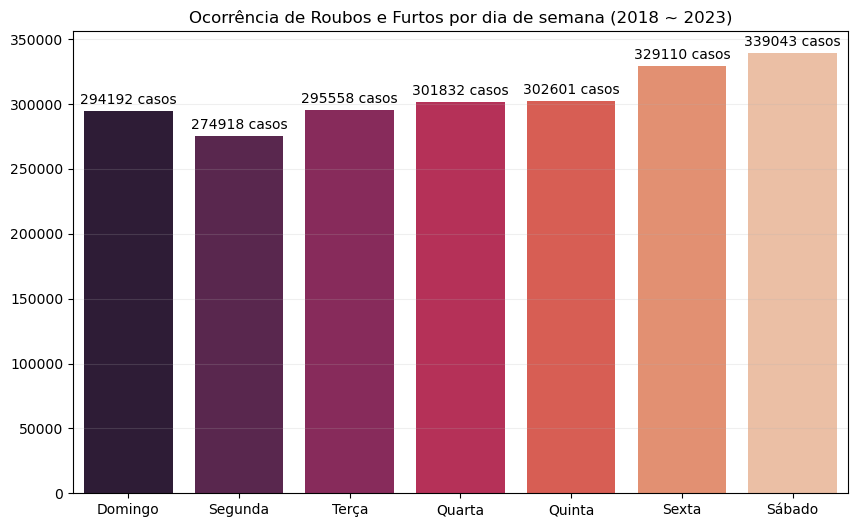

In [24]:
contagem = dados_ocorrencias['dia_semana_ocorrencia'].value_counts().sort_index()

# Renomeando as categorias dos dias da semana.
contagem = contagem.rename({1: 'Domingo', 2: 'Segunda', 3: 'Terça', 4: 'Quarta', 5: 'Quinta', 6: 'Sexta', 7: 'Sábado'})

# Gerando o gráfico.
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=contagem.index, y=contagem.values, orient ='v', palette='rocket', ax=ax)
ax.set_title('Ocorrência de Roubos e Furtos por dia de semana (2018 ~ 2023)', fontsize=12, loc='center')
ax.set(xlabel='', ylabel='', xticklabels=contagem.index)
ax.set(xlabel='', ylabel='')
ax.grid(axis='y', alpha=0.2)   
# Adicionando labels aos valores das barras.
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f') + ' casos', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 8), 
                textcoords = 'offset points')
fig = plt.gcf()

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/quantidade_ocorrencia_semanal.png', transparent=False, dpi=300, bbox_inches='tight')

### Ocorrência por período

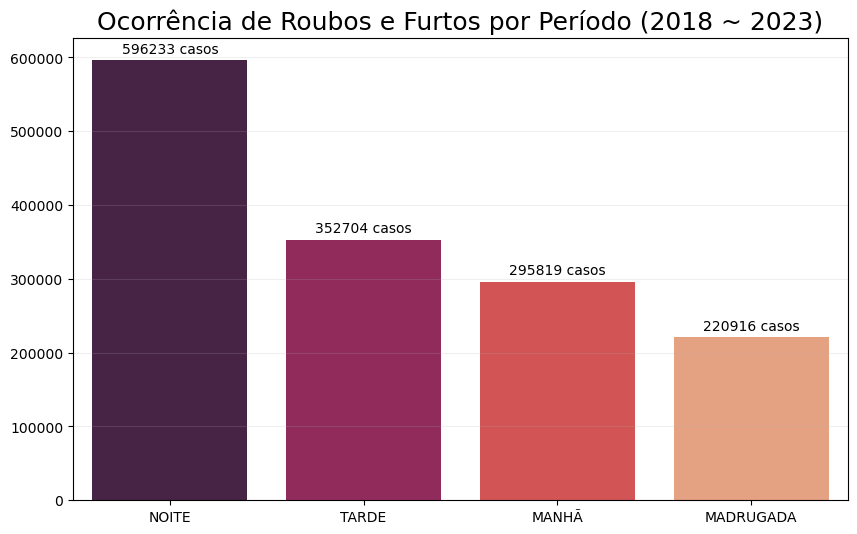

In [25]:
# Filtrando, contando e ordenando os dados.
categoria_indesejada = 'HORA INCERTA'
dados_filtrados = dados_ocorrencias[dados_ocorrencias['periodo_dia_ocorrencia'] != categoria_indesejada]
dados_filtrados = dados_filtrados['periodo_dia_ocorrencia'].value_counts().sort_values(ascending=False).reset_index()
dados_filtrados.columns = ['periodo_dia_ocorrencia', 'Contagem']

# Gerando o gráfico.
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=dados_filtrados, x='periodo_dia_ocorrencia', y='Contagem', palette='rocket')
ax.set_title('Ocorrência de Roubos e Furtos por Período (2018 ~ 2023)', loc='center', fontsize=18)
ax.set(xlabel='', ylabel='')
ax.grid(axis='y', alpha=0.2)   
# Adicionando labels aos valores das barras.
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f') + ' casos', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center',
                xytext = (0, 8), 
                textcoords = 'offset points')
fig = plt.gcf()
plt.show()

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/quantidade_ocorrencia_periodo.png', transparent=False, dpi=300, bbox_inches='tight')

### Top 10 cidades com mais ocorrências

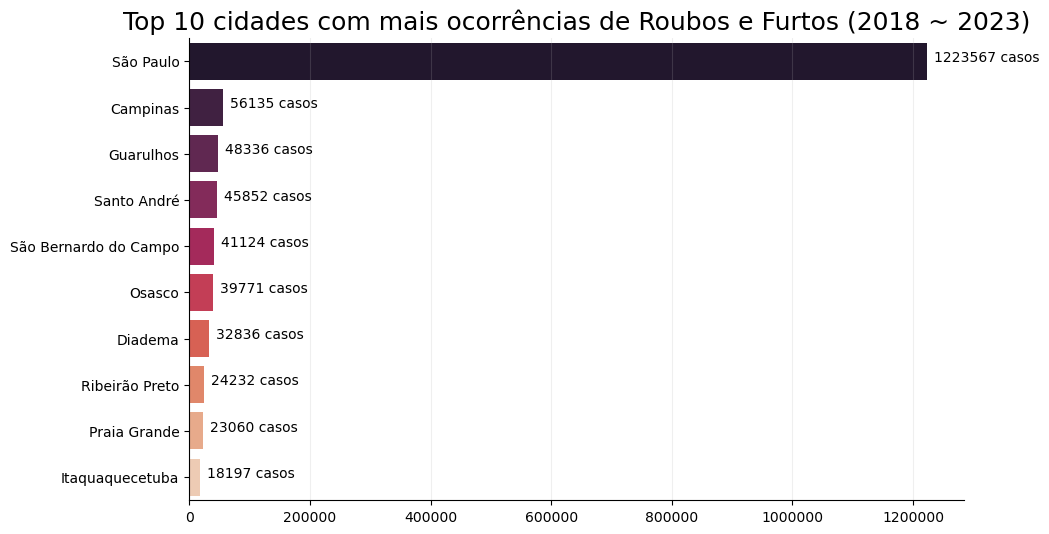

In [26]:
# Verificando as 10 cidades com mais ocorrências.
contagem = dados_ocorrencias['cidade'].value_counts().head(10)

# Gerando o gráfico.
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=contagem.values, y=contagem.index, orient ='h', palette='rocket')
ax.set_title('Top 10 cidades com mais ocorrências de Roubos e Furtos (2018 ~ 2023)', loc='center', fontsize=18)
ax.set(xlabel='', ylabel='', xticklabels=(ax.get_xticks().astype(int)))
sns.despine()
ax.grid(axis='x', alpha=0.2)   
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f') + ' casos', 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                xytext=(5, 0), 
                textcoords='offset points')
fig = plt.gcf()
plt.show()

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/top10_cidades.png', transparent=False, dpi=300, bbox_inches='tight')

### Top 10 bairros com mais ocorrências

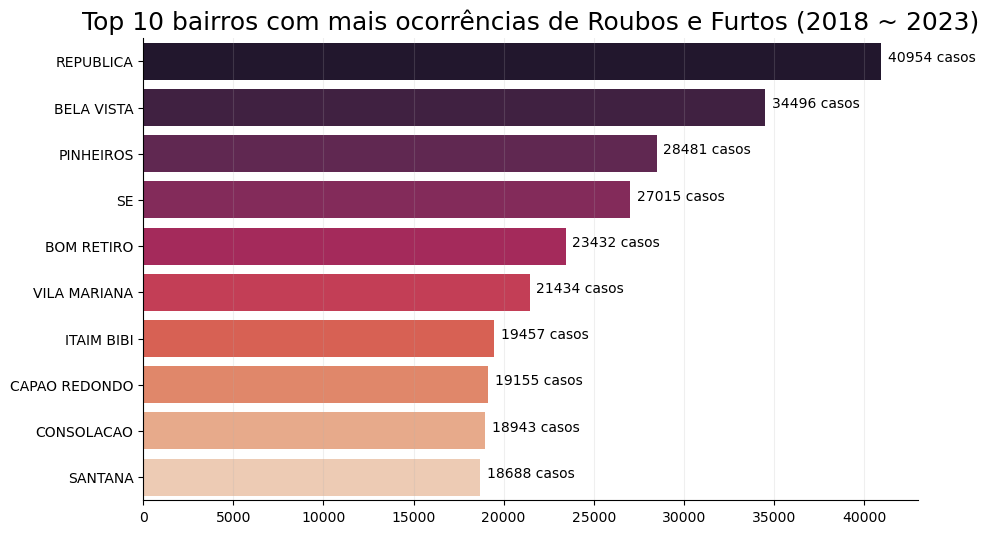

In [27]:
# Verificando os 10 bairros com mais ocrrências.
contagem = dados_ocorrencias[['bairro', 'cidade']].value_counts().head(10).reset_index()
contagem.columns = ['local','','Contagem']

# Gerando o gráfico.
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(data=contagem, x='Contagem', y='local', orient='h', palette='rocket')
ax.set_title('Top 10 bairros com mais ocorrências de Roubos e Furtos (2018 ~ 2023)', loc='center', fontsize=18)
ax.set(xlabel='', ylabel='')
sns.despine()
ax.grid(axis='x', alpha=0.2)   
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f') + ' casos', 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                xytext=(5, 0), 
                textcoords='offset points')
fig = plt.gcf()
plt.show()

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/top10_bairros.png', transparent=False, dpi=300, bbox_inches='tight')

### Top 10 locais com mais ocorrências de roubo

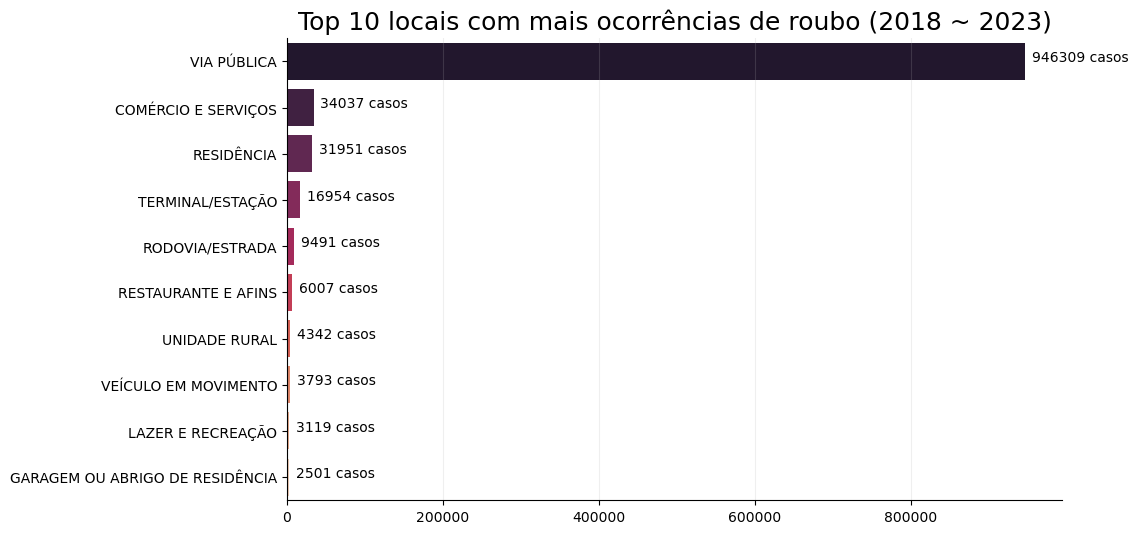

In [28]:
dados_ignorados = 'OUTROS'
dados_filtrados = dados_roubo[dados_roubo['descricao_local'] != dados_ignorados]
dados_filtrados = dados_filtrados['descricao_local'].value_counts().sort_values(ascending=False).reset_index().head(10)
dados_filtrados.columns = ['descricao_local', 'Contagem']

# Gerando o gráfico.
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=dados_filtrados, x='Contagem', y='descricao_local', palette='rocket')
ax.set_title('Top 10 locais com mais ocorrências de roubo (2018 ~ 2023)', loc='center', fontsize=18)
ax.set(xlabel='', ylabel='', xticklabels=(ax.get_xticks().astype(int)))
sns.despine()
ax.grid(axis='x', alpha=0.2)    
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f') + ' casos', 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                xytext=(5, 0), 
                textcoords='offset points')
fig = plt.gcf()
plt.show()

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/top10_local_roubo.png', transparent=False, dpi=300, bbox_inches='tight')

### Top 10 locais com mais ocorrências de furto

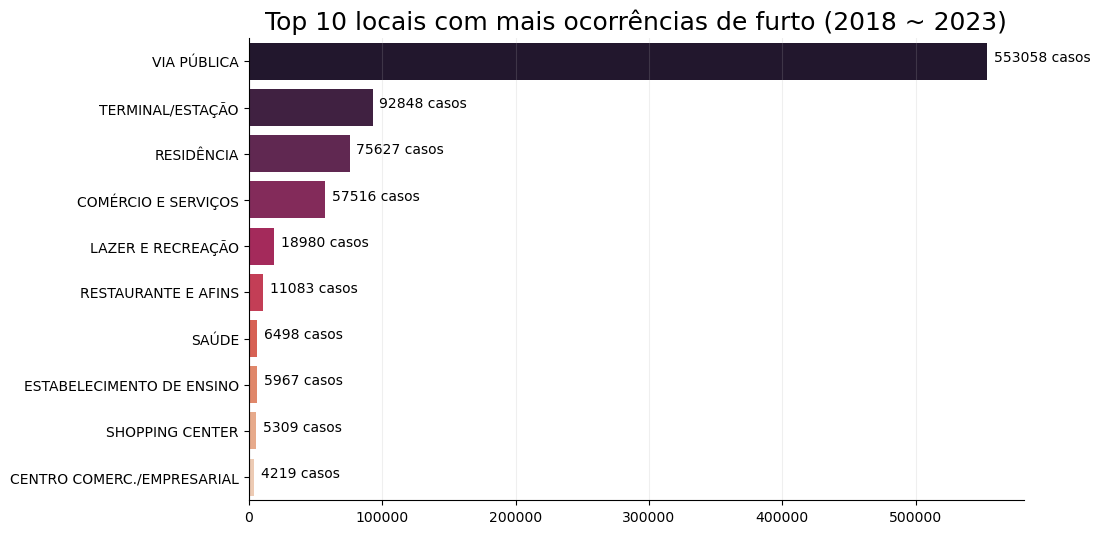

In [29]:
dados_ignorados = 'OUTROS'
dados_filtrados = dados_furto[dados_furto['descricao_local'] != dados_ignorados]
dados_filtrados = dados_filtrados['descricao_local'].value_counts().sort_values(ascending=False).reset_index().head(10)
dados_filtrados.columns = ['descricao_local', 'Contagem']

# Gerando o gráfico.
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=dados_filtrados, x='Contagem', y='descricao_local', palette='rocket')
ax.set_title('Top 10 locais com mais ocorrências de furto (2018 ~ 2023)', loc='center', fontsize=18)
ax.set(xlabel='', ylabel='', xticklabels=(ax.get_xticks().astype(int)))
sns.despine()
ax.grid(axis='x', alpha=0.2)    
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f') + ' casos', 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                xytext=(5, 0), 
                textcoords='offset points')
fig = plt.gcf()
plt.show()

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/top10_local_furto.png', transparent=False, dpi=300, bbox_inches='tight')

## Análises: Vítimas

In [30]:
dados_vitimas['grau_instrucao'].value_counts().sum()

1048

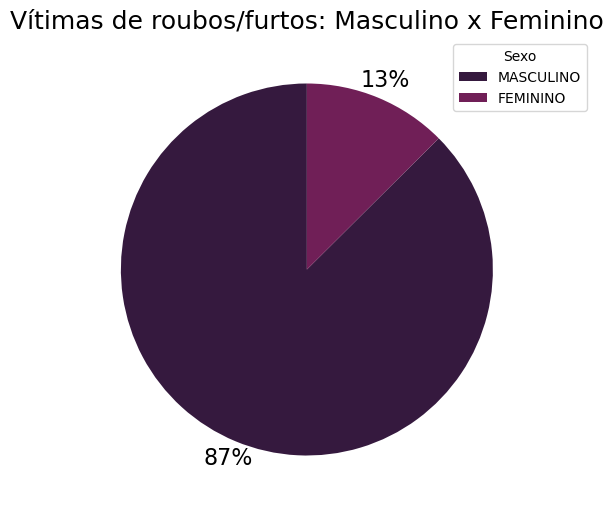

In [31]:
sns.set_palette("rocket")
# Contando as vítimas por sexo.
contagem = dados_vitimas['sexo'].value_counts()

# Gerando o gráfico.
fig, ax = plt.subplots(figsize=(6,7))
ax.pie(x=contagem.values, autopct='%.0f%%', startangle=90, textprops={'color': 'black', 'fontsize': 16}, pctdistance=1.1)
ax.set_title('Vítimas de roubos/furtos: Masculino x Feminino', fontsize=18, loc='center')
ax.legend(contagem.index, title='Sexo', loc='upper left', bbox_to_anchor=(0.8,1))
fig = plt.gcf()
plt.show()

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/vitima_sexo.png', transparent=False, dpi=300, bbox_inches='tight')

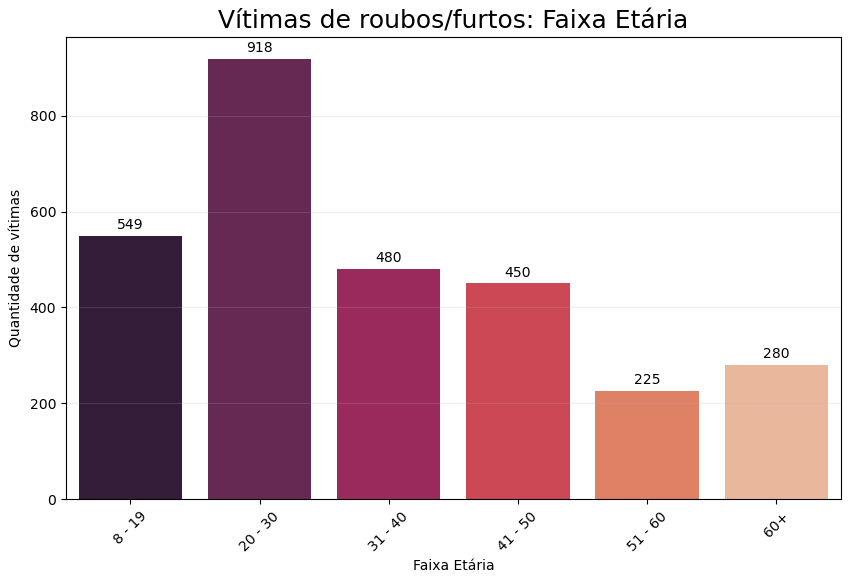

In [32]:
# Criando rótulos.
faixas_etarias = [8, 20, 31, 41, 51, 60, 100] 
rotulos_faixas = ['8 - 19', '20 - 30', '31 - 40', '41 - 50', '51 - 60', '60+']

idade_invalido = dados_vitimas['idade'] == 0
dados_filtrados = dados_vitimas.drop(dados_vitimas[idade_invalido].index)
dados_filtrados['faixa_etaria'] = pd.cut(dados_filtrados['idade'], bins=faixas_etarias, labels=rotulos_faixas, right=False)
contagem = dados_filtrados['faixa_etaria'].value_counts().sort_index()

# Gerando o gráfico.
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=contagem.index, y=contagem.values, orient ='v', palette='rocket')
ax.set_title('Vítimas de roubos/furtos: Faixa Etária', loc='center', fontsize=18)
ax.set(xlabel='Faixa Etária', ylabel='Quantidade de vítimas')
plt.xticks(rotation=45)
ax.grid(axis='y', alpha=0.2)
# Adicionando labels aos valores das barras.
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 8), 
                textcoords = 'offset points')
fig = plt.gcf()
plt.show()  

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/vitima_idade.png', transparent=False, dpi=300, bbox_inches='tight')

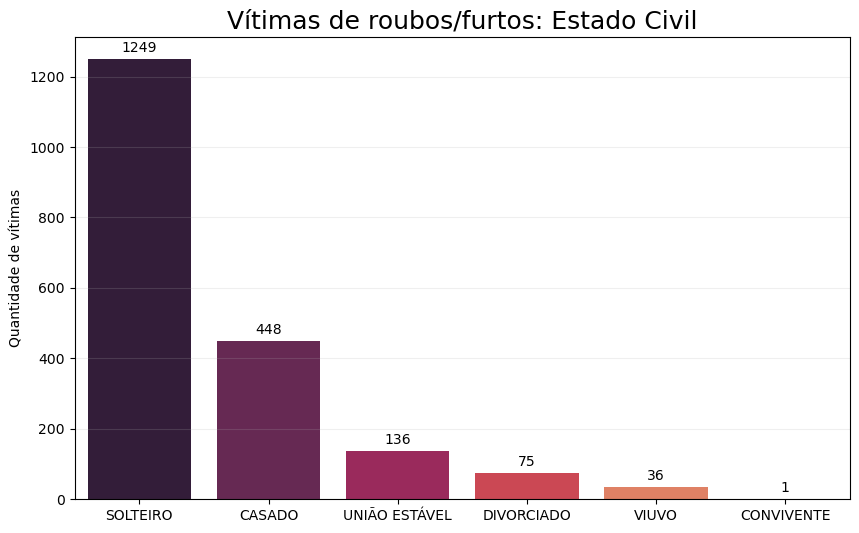

In [33]:
# Filtrando, contando e ordenando os dados.
dados_ignorados = 'IGNORADO'
dados_filtrados = dados_vitimas.dropna(subset=['estado_civil'])
dados_filtrados = dados_filtrados[dados_filtrados['estado_civil'] != dados_ignorados]
dados_ordenados = dados_filtrados['estado_civil'].value_counts().reset_index()
dados_ordenados.columns = ['estado_civil', 'Contagem']
dados_ordenados = dados_ordenados.sort_values(by='Contagem', ascending=False)

# Gerando o gráfico.
plt.figure(figsize=(10, 6))
ax = sns.barplot(data= dados_ordenados, x='estado_civil', y='Contagem', palette='rocket')
ax.set_title('Vítimas de roubos/furtos: Estado Civil', loc='center', fontsize=18)
ax.set(xlabel='', ylabel='Quantidade de vítimas')
ax.grid(axis='y', alpha=0.2)
# Adicionando labels aos valores das barras.
for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 8), 
                textcoords = 'offset points')
fig = plt.gcf()
plt.show()

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/vitima_estado_civil.png', transparent=False, dpi=300, bbox_inches='tight')

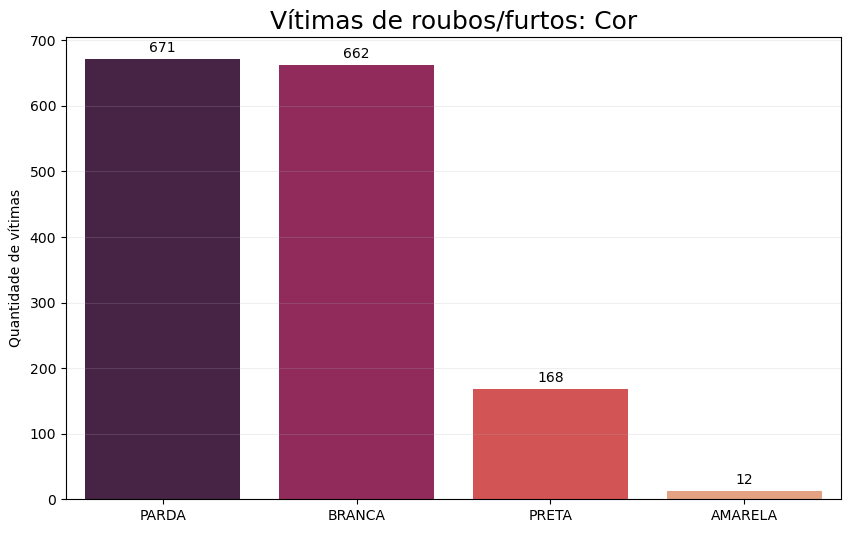

In [34]:
# Filtrando, contando e ordenando os dados.
dados_ignorados = 'NÃO INFORMADA'
dados_filtrados = dados_vitimas.dropna(subset=['cor'])
dados_filtrados = dados_filtrados[dados_filtrados['cor'] != dados_ignorados]
dados_ordenados = dados_filtrados['cor'].value_counts().reset_index()
dados_ordenados.columns = ['cor', 'Contagem']
dados_ordenados = dados_ordenados.sort_values(by='Contagem', ascending=False)

# Gerando o gráfico.
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=dados_ordenados, x='cor', y='Contagem', palette='rocket')
ax.set_title('Vítimas de roubos/furtos: Cor', loc='center', fontsize=18)
ax.set(xlabel='', ylabel='Quantidade de vítimas')
ax.grid(axis='y', alpha=0.2)
# Adicionando labels aos valores das barras.
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 8), 
                textcoords = 'offset points')
fig = plt.gcf()
plt.show()

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/vitima_cor.png', transparent=False, dpi=300, bbox_inches='tight')

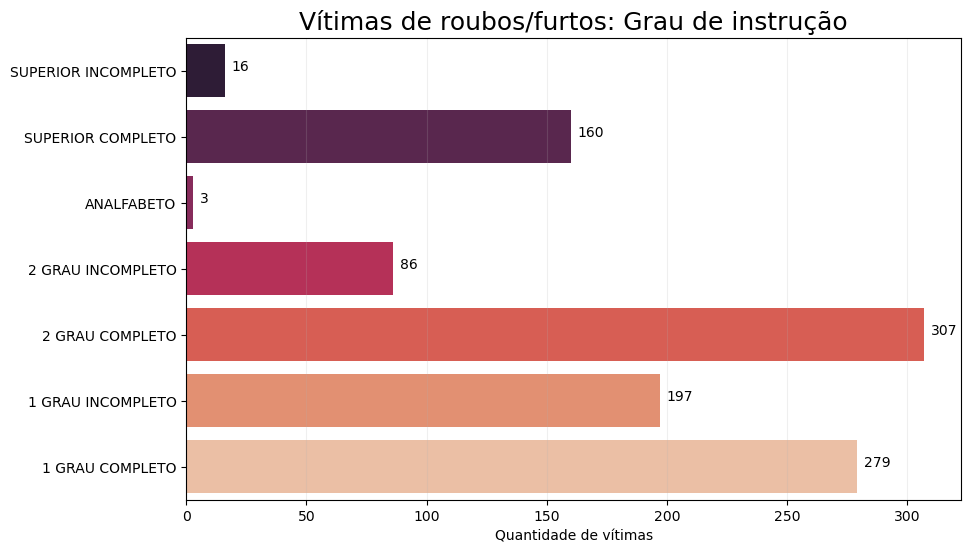

In [35]:
# Filtrando, contando e ordenando os dados.
dados_filtrados = dados_vitimas.dropna(subset=['grau_instrucao'])
dados_filtrados = dados_filtrados[dados_filtrados['grau_instrucao'] != dados_ignorados]
dados_ordenados = dados_filtrados['grau_instrucao'].value_counts().reset_index()
dados_ordenados.columns = ['grau_instrucao', 'Contagem']
dados_ordenados = dados_ordenados.sort_values(by='grau_instrucao', ascending=False)

# Gerando o gráfico.
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=dados_ordenados, x='Contagem', y='grau_instrucao', orient='h', palette='rocket')
ax.set_title('Vítimas de roubos/furtos: Grau de instrução', loc='center', fontsize=18)
ax.set(xlabel='Quantidade de vítimas', ylabel='')
ax.grid(axis='x', alpha=0.2)
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                xytext=(5, 0), 
                textcoords='offset points')
fig = plt.gcf()
plt.show()

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/vitima_grau_instrucao.png', transparent=False, dpi=300, bbox_inches='tight')

# <font color='red' style='font-size: 30px;'>Implementando um Modelo Preditivo</font>
<hr style='border: 2px solid red;'>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Para gerar um modelo preditivo, utilizaremos somente o dataframe de ocorrências de ROUBOS e selecionar as colunas para separarmos em features e target.
Inicialmente, verificamos quais são as colunas existentes no nosso dataframe.</p>

In [36]:
# Visualizando as 5 primeiras linhas.
dados_roubo.tail()

,categoria,periodo_boletim,dia_semana_boletim,numero_boletim,boletim_iniciado,boletim_emitido,periodo_ocorrencia,data_ocorrencia,hora_ocorrencia,dia_semana_ocorrencia,periodo_dia_ocorrencia,bairro,id_cidade,cidade,descricao_local,solucao,tipo_delegacia,nome_delegacia,flagrante,consumado,vitima_fatal,ano_ocorrencia,mes_ocorrencia
1124088,RouboCelular,2023-10,2,6008/2023,2023-10-30 20:21:16,2023-10-30 20:21:16,2023-10,2023-10-26,16:25:00,5,TARDE,BAIRRO POZZOBOM,644,Votuporanga,CONDOMINIO COMERCIAL,APRECIAÇÃO DO DELEGADO TITULAR,1,DEL.SEC.VOTUPORANGA PLANTÃO,0,1,0,2023,10
1124089,RouboCelular,2023-10,2,6008/2023,2023-10-30 20:21:16,2023-10-30 20:21:16,2023-10,2023-10-26,16:25:00,5,TARDE,BAIRRO POZZOBOM,644,Votuporanga,CONDOMINIO COMERCIAL,APRECIAÇÃO DO DELEGADO TITULAR,1,DEL.SEC.VOTUPORANGA PLANTÃO,0,1,0,2023,10
1124090,RouboCelular,2023-10,2,6008/2023,2023-10-30 20:21:16,2023-10-30 20:21:16,2023-10,2023-10-26,16:25:00,5,TARDE,BAIRRO POZZOBOM,644,Votuporanga,CONDOMINIO COMERCIAL,APRECIAÇÃO DO DELEGADO TITULAR,1,DEL.SEC.VOTUPORANGA PLANTÃO,0,1,0,2023,10
1124091,RouboCelular,2023-10,2,6008/2023,2023-10-30 20:21:16,2023-10-30 20:21:16,2023-10,2023-10-26,16:25:00,5,TARDE,BAIRRO POZZOBOM,644,Votuporanga,CONDOMINIO COMERCIAL,APRECIAÇÃO DO DELEGADO TITULAR,1,DEL.SEC.VOTUPORANGA PLANTÃO,0,1,0,2023,10
1124092,RouboCelular,2023-10,2,6008/2023,2023-10-30 20:21:16,2023-10-30 20:21:16,2023-10,2023-10-26,16:25:00,5,TARDE,BAIRRO POZZOBOM,644,Votuporanga,CONDOMINIO COMERCIAL,APRECIAÇÃO DO DELEGADO TITULAR,1,DEL.SEC.VOTUPORANGA PLANTÃO,0,1,0,2023,10


### Separando os dados

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Por termos mais dados da cidade de São Paulo, trabalharemos somente com os 10 principais bairros onde há mais ocorrências. Assim, filtraremos os dados da seguinte forma:</p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nesse caso, selecionamos as colunas abaixo para criarmos uma nova dataframe a fim de gerar um modelo preditivo.</p>
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
<li>data_ocorrencia</li>
<li>dia_semana_ocorrencia</li>
<li>hora_ocorrencia</li>
<li>cidade</li>
<li>bairro</li>
<li>consumado</li>
</ul>

In [37]:
# Verificando os dados nulos.
dados_ocorrencias.isnull().sum()

categoria                      0
periodo_boletim                0
dia_semana_boletim             0
numero_boletim                 0
boletim_iniciado               0
boletim_emitido                0
periodo_ocorrencia             0
data_ocorrencia                0
hora_ocorrencia           671582
dia_semana_ocorrencia          0
periodo_dia_ocorrencia         0
bairro                     45643
id_cidade                      0
cidade                      1467
descricao_local                0
solucao                        0
tipo_delegacia                 0
nome_delegacia                 0
flagrante                      0
consumado                      0
vitima_fatal                   0
ano_ocorrencia                 0
mes_ocorrencia                 0
dtype: int64

In [38]:
# Criando um novo dataframe.
dados_ML = dados_ocorrencias[['data_ocorrencia', 'dia_semana_ocorrencia', 'hora_ocorrencia', 'cidade', 'bairro', 'consumado']]

# Verificando os dados nulos.
dados_ML.isna().sum()

data_ocorrencia               0
dia_semana_ocorrencia         0
hora_ocorrencia          671582
cidade                     1467
bairro                    45643
consumado                     0
dtype: int64

In [39]:
# Deletando os dados nulos.
dados_ML.dropna(inplace=True)
# Verificando os dados nulos.
dados_ML.isna().sum()

C:\Users\natsu\AppData\Local\Temp\ipykernel_17064\1352678968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_ML.dropna(inplace=True)


data_ocorrencia          0
dia_semana_ocorrencia    0
hora_ocorrencia          0
cidade                   0
bairro                   0
consumado                0
dtype: int64

In [40]:
# Convertendo para tipo datetime.
dados_ML['data_ocorrencia'] = pd.to_datetime(dados_ML['data_ocorrencia'])

# Separando por dia, mês e ano.
dados_ML['dia'] = dados_ML['data_ocorrencia'].dt.day
dados_ML['mes'] = dados_ML['data_ocorrencia'].dt.month
dados_ML['ano'] = dados_ML['data_ocorrencia'].dt.year

# Deletando a coluna data_ocorrencia.
dados_ML.drop(columns='data_ocorrencia', inplace=True)

C:\Users\natsu\AppData\Local\Temp\ipykernel_17064\3071139114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_ML['data_ocorrencia'] = pd.to_datetime(dados_ML['data_ocorrencia'])
C:\Users\natsu\AppData\Local\Temp\ipykernel_17064\3071139114.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_ML['dia'] = dados_ML['data_ocorrencia'].dt.day
C:\Users\natsu\AppData\Local\Temp\ipykernel_17064\3071139114.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [41]:
# Selecionando somente os dados da cidade de São Paulo e eliminando os dados duplicados.
selecao = 'São Paulo'
dados_ML = dados_ML[dados_ML['cidade'] == selecao]
dados_ML.drop(columns='cidade', inplace=True)

# Verificando o tamanho do dataset.
linha, coluna = dados_ML.shape
print(f'linhas: {linha}\ncolunas: {coluna}')

linhas: 790374
colunas: 7


In [42]:
selecao = dados_ML['bairro'].value_counts().head(10)
selecao

bairro
REPUBLICA        26299
SE               18951
CAPAO REDONDO    15960
BELA VISTA       15283
GRAJAU           14890
PINHEIROS        14105
JARDIM ANGELA    12993
VILA MARIANA     12818
LIBERDADE        12633
BOM RETIRO       11523
Name: count, dtype: int64

In [43]:
# Filtrando os dados somente dos 10 bairros com mais ocorrências.
selecao = dados_ML['bairro'].value_counts().head(10)
dados_ML = dados_ML[dados_ML['bairro'].isin(selecao.index)]
dados_ML.reset_index(drop=True, inplace=True)

# Verificando o tamanho do dataset.
linha, coluna = dados_ML.shape
print(f'linhas: {linha}\ncolunas: {coluna}')

linhas: 155455
colunas: 7


In [44]:
# Tratar a coluna horaOcorrencia.
dados_ML['hora_ocorrencia'] = pd.to_datetime(dados_ML['hora_ocorrencia'], format='%H:%M:%S').dt.time

# Criando uma função para mapear cada hora para um período do dia
def periodo_do_dia(hora):
    if 1 < hora.hour <= 2:
        return '01:00-02:00'
    elif 2 < hora.hour <= 4:
        return '03:00-04:00'
    elif 4 < hora.hour <= 6:
        return '05:00-06:00'
    elif 6 < hora.hour <= 8:
        return '07:00-08:00'
    elif 8 < hora.hour <= 10:
        return '09:00-10:00'
    elif 10 < hora.hour <= 12:
        return '11:00-12:00'
    elif 12 < hora.hour <= 14:
        return '13:00-14:00'
    elif 14 < hora.hour <= 16:
        return '15:00-16:00'
    elif 16 < hora.hour <= 18:
        return '17:00-18:00'
    elif 18 < hora.hour <= 20:
        return '19:00-20:00'
    elif 20 < hora.hour <= 22:
        return '21:00-22:00'
    else:
        return '23:00-00:00'

# Aplicando a função e criar novas colunas
dados_ML['hora_ocorrencia'] = dados_ML['hora_ocorrencia'].apply(periodo_do_dia)

### Transformando as colunas categóricas em numéricas

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Ao observarmos o dataframe, notamos que temos 2 colunas com dados categóricos: Bairro e hora ocorrencia.</p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px;'>Ao aplicar labels_encoder na coluna 'bairro', os dados serão substituídos da seguinte forma:</p>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
<li>0 = REPUBLICA</li>
<li>1 = SE</li>
<li>2 = CAPAO REDONDO</li>
<li>3 = BELA VISTA</li>
<li>4 = GRAJAU</li>
<li>5 = PINHEIROS</li>
<li>6 = JARDIM ANGELA</li>
<li>7 = VILA MARIANA</li>
<li>8 = LIBERDADE</li>
<li>9 = BOM RETIRO</li>
</ul>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px;'>Ao aplicar labels_encoder na coluna 'horaOcorrencia', os dados serão substituídos da seguinte forma:</p>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
<li>01:00-02:00 = 0</li>
<li>03:00-04:00 = 1</li>
<li>05:00-06:00 = 2</li>
<li>07:00-08:00 = 3</li>
<li>09:00-10:00 = 4</li>
<li>11:00-12:00 = 5</li>
<li>13:00-14:00 = 6</li>
<li>15:00-16:00 = 7</li>
<li>17:00-18:00 = 8</li>
<li>19:00-20:00 = 9</li>
<li>21:00-22:00 = 10</li>
<li>23:00-00:00 = 11</li>
</ul>

In [45]:
# Importando o LabelEncoder para transformar as variáveis categóricas em numéricas.
from sklearn.preprocessing import LabelEncoder

# Instanciando o LabelEncoder.
label_encoder = LabelEncoder()

# Ajustando e transformando a coluna "bairro"
dados_ML['bairro'] = label_encoder.fit_transform(dados_ML['bairro'])

# Ajustando e transformando a coluna "horaOcorrencia"
dados_ML['hora_ocorrencia'] = label_encoder.fit_transform(dados_ML['hora_ocorrencia'])

dados_ML.head(10)

,dia_semana_ocorrencia,hora_ocorrencia,bairro,consumado,dia,mes,ano
0,5,9,7,1,4,1,2018
1,6,2,5,1,5,1,2018
2,5,10,7,1,4,1,2018
3,5,10,7,1,4,1,2018
4,5,3,2,1,4,1,2018
5,5,6,0,1,4,1,2018
6,5,10,0,1,4,1,2018
7,5,10,3,1,4,1,2018
8,5,10,7,1,4,1,2018
9,5,5,7,1,4,1,2018


In [46]:
dados_ML.shape

(155455, 7)

### Separando os dados em features e target

In [47]:
# dados X = dados de entrada (features)
X = dados_ML.drop(['consumado'], axis = 1)
# dados y = dados de saída (target)
y = dados_ML['consumado']

In [48]:
# Visualizando os dados de entrada.
X

,dia_semana_ocorrencia,hora_ocorrencia,bairro,dia,mes,ano
0,5,9,7,4,1,2018
1,6,2,5,5,1,2018
2,5,10,7,4,1,2018
3,5,10,7,4,1,2018
4,5,3,2,4,1,2018
...,...,...,...,...,...,...
155450,5,4,9,26,10,2023
155451,6,5,0,27,10,2023
155452,5,9,9,26,10,2023
155453,6,7,1,27,10,2023


In [49]:
# Visualizando os dados de saída.
y

0         1
1         1
2         1
3         1
4         1
         ..
155450    1
155451    1
155452    1
155453    1
155454    1
Name: consumado, Length: 155455, dtype: int64

### Balanceamento de dados

<p style='font-size: 18px; line-height: 2; margin: 10px 50px;'>Podemos observar que a nossa coluna 'consumado' possui mais dados 1 do que 0. Sendo assim, precisamos balancear os dados. Nesse caso, geraremos os dados sintéticos utilizando função SMOTE para gerar mesma quantidade de dados 0.</p>

consumado
1    155343
0       112
Name: count, dtype: int64

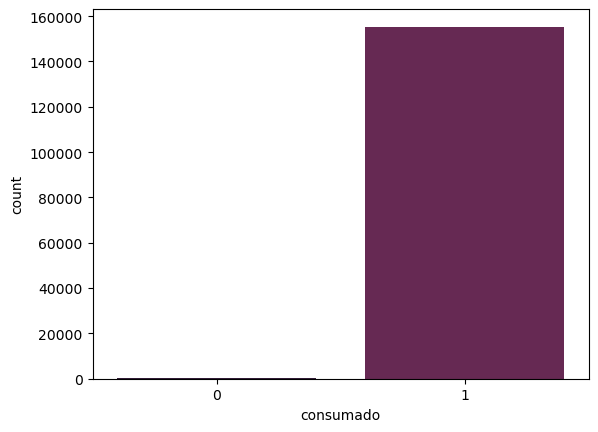

In [50]:
from numpy import random

# Criando um gráfico para verificar a distribuição dos dados 0 e 1 da coluna 'consumado'.
ax = sns.countplot(x='consumado', data=dados_ML)

# Contando os valores da coluna 'consumado'.
dados_ML['consumado'].value_counts()

In [51]:
# Importando a classe SMOTE para gerar dados sintéticos.
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados.

consumado
1    155343
0    155343
Name: count, dtype: int64

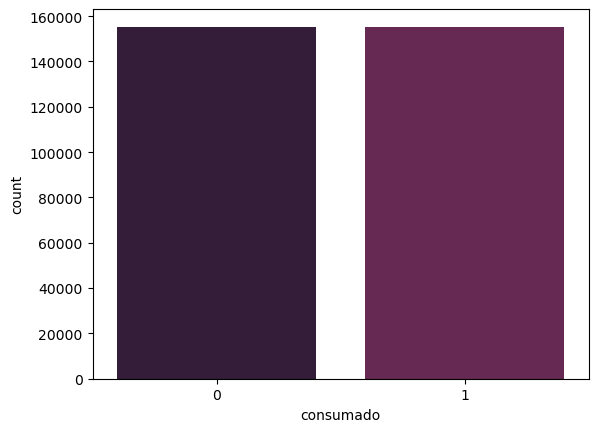

In [52]:
# Concatena a variável target (y) com as features (X)
dados_ML_v1 = pd.concat([X, y], axis=1)

# Criando um gráfico para verificar a distribuição dos dados 0 e 1 da coluna 'consumado'.
ax = sns.countplot(x='consumado', data=dados_ML_v1)

# Verifica se o balanceamento foi realizado.
dados_ML_v1['consumado'].value_counts()

### Normalizando os dados com StandardScaler

In [53]:
from sklearn.preprocessing import StandardScaler

# Deixando os dados do feature na mesma escala.
norm = StandardScaler()

x_norm = norm.fit_transform(X)
x_norm[0]

array([ 0.49024314,  0.69769636,  0.86694248, -1.33595227, -1.64597449,
       -1.53432645])

### Separando os dados de treino e teste com train_test_split

In [54]:
from sklearn.model_selection import train_test_split
# Definindo a semente para o random.
SEED = 123143
random.seed(SEED)

# Separando os dados em treino e teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(x_norm, # Dados de entrada normalizados
                                                        y, # Dados de saída (target)
                                                        test_size = 0.3, # 30% dos dados para teste. Demais 70% para treino.
                                                        random_state = SEED, #random_state: Estado de aleatoriedade.
                                                        stratify=y)

<font color='red' style='font-size: 30px;'>Implementação de algoritmo de ML</font>
<hr style='border: 2px solid red;'>

<font color='red' style='font-size: 30px;'>Implementando método baseado na proximidade: KNN</font>

In [55]:
# Importando biblioteca para criar o modelo de machine learning.
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o modelo.
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=100, weights='distance')

# treinando o modelo com os dados de treino.
knn.fit(X_treino, y_treino)

# Realizando a previsão com os dados de teste.
predito_knn = knn.predict(X_teste)
predito_knn

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

     Acurácia  Precisão    Recall        F1   ROC AUC
KNN  0.971987  0.999773  0.944188  0.971186  0.971987


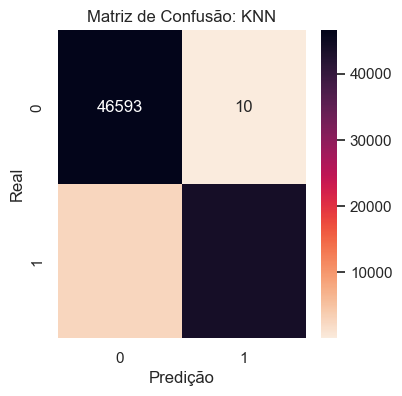

In [56]:
# Importando as métricas para avaliar o modelo.
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

def calculando_metrica(y_teste, predito, modelo):
    
    metricas = {'Acurácia': [accuracy_score(y_teste, predito)],
            'Precisão': [precision_score(y_teste, predito)],
            'Recall': [recall_score(y_teste, predito)],
            'F1': [f1_score(y_teste, predito)],
            'ROC AUC': [roc_auc_score(y_teste, predito)]}
    
    # Criando um dataframe com as métricas.
    df_metricas = pd.DataFrame(metricas, index=[modelo])
    print(df_metricas)

    # Printando a matriz de confusão com os dados de teste e o modelo do knn.
    matriz_confusao = confusion_matrix(y_teste, predito)

    # Gerando o gráfico de matriz de confusão.
    plt.figure(figsize=(4,4))
    sns.set(font_scale=1)
    sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='rocket_r').set(title = f'Matriz de Confusão: {modelo}', xlabel='Predição', ylabel='Real')
    plt.show()
    

# Chamando a função para calcular as métricas.
calculando_metrica(y_teste, predito_knn, 'KNN')

<font color='red' style='font-size: 30px;'>Implementando método probabilístico: Bernoulli Naive Bayes</font>

             Acurácia  Precisão    Recall        F1   ROC AUC
BernoulliNB  0.624638  0.637959  0.576358  0.605596  0.624638


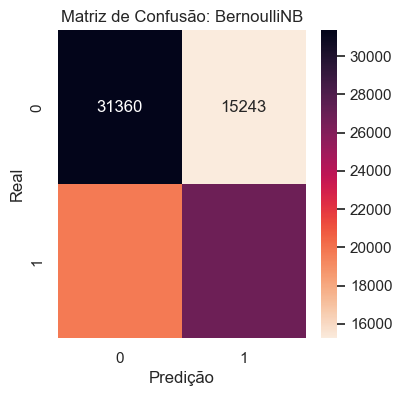

In [57]:
# Importando biblioteca para criar o modelo de machine learning.
from sklearn.naive_bayes import BernoulliNB

# Instandiando o modelo.
bnb = BernoulliNB(binarize=0.5)

# treinano o modelo com os dados de treino.
bnb.fit(X_treino, y_treino)

# Realizando a previsão com os dados de teste.
predito_bnb = bnb.predict(X_teste)

# Chamando a função para calcular as métricas.
calculando_metrica(y_teste, predito_bnb, 'BernoulliNB')

<font color='red' style='font-size: 30px;'>Implementando método simbólico: DecisionTreeClassifier</font>

                        Acurácia  Precisão    Recall        F1   ROC AUC
DecisionTreeClassifier  0.642126  0.920193  0.311246  0.465157  0.642126


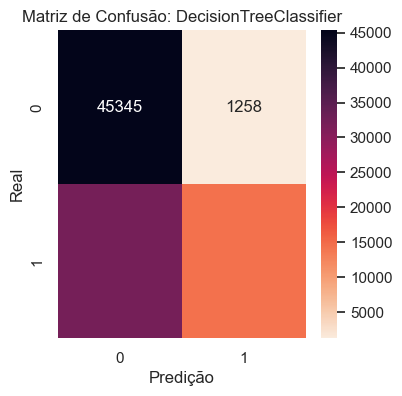

In [58]:
# Importando a biblioteca.
from sklearn.tree import DecisionTreeClassifier

# Instanciando o modelo.
dtc = DecisionTreeClassifier(criterion='entropy',
                            max_depth=5,
                            random_state=42)

# Treinando o modelo.
dtc.fit(X_treino, y_treino)

# Realizando a previsão com os dados de teste.
predito_dtc = dtc.predict(X_teste)

# Chamando a função para calcular as métricas.
calculando_metrica(y_teste, predito_dtc, 'DecisionTreeClassifier')

<font color='red' style='font-size: 30px;'>Implementando método simbólico: RandomForestClassifier</font>

                        Acurácia  Precisão    Recall        F1   ROC AUC
RandomForestClassifier  0.998519  0.999742  0.997296  0.998518  0.998519


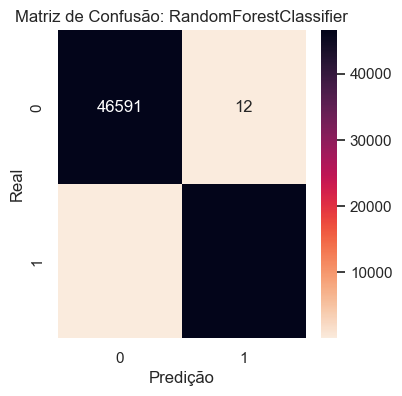

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Instanciando o classificador.
rfc = RandomForestClassifier(n_estimators = 500)

# Treinando o modelo.
rfc.fit(X_treino, y_treino)

# Realizando a previsão com os dados de teste.
predito_rfc = rfc.predict(X_teste)

# Chamando a função para calcular as métricas.
calculando_metrica(y_teste, predito_rfc, 'RandomForestClassifier')

<font color='red' style='font-size: 30px;'>Implementando: Regressão Logística</font>

                    Acurácia  Precisão    Recall        F1   ROC AUC
LogisticRegression  0.563977  0.566893  0.542175  0.554259  0.563977


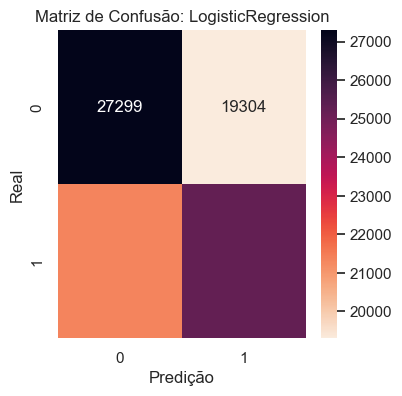

In [60]:
from sklearn.linear_model import LogisticRegression

# Instanciando o modelo.
lr = LogisticRegression()

# Treinando o modelo.
lr.fit(X_treino, y_treino)

# Realizando a previsão com os dados de teste.
predito_lr = lr.predict(X_teste)

# Chamando a função para calcular as métricas.
calculando_metrica(y_teste, predito_lr, 'LogisticRegression')